### Decsion Trees
A file to explore applicaitons of Decision Tree Classifiers for predicting the winner of a fight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p= p+'UfcDiffData.csv'
p

'C:\\Users\\walkowae\\Desktop\\GitProjects\\UfcDiffData.csv'

In [3]:
df = pd.read_csv(p)
df = df.drop(['Unnamed: 0'], axis = 1)

df.head(3)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,Loss
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Win


In [4]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.head()

Index([], dtype='object')


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.000000,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.000000,1.000,1.000000,...,0,0,0,1,0,0,0,1,0,Loss
1,0.000000,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.000000,0.000,0.000000,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.500000,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.000000,0.000,0.000000,...,0,0,0,1,0,0,0,1,0,Win
3,0.000000,0.500000,0.006562,0.034062,-0.304375,0.062500,0.468750,-1.625000,-0.625,-0.625000,...,0,0,0,1,0,0,1,0,0,Win
4,0.472656,0.000000,0.115723,0.118164,-0.006523,-0.073906,0.070312,0.003906,0.000,0.015625,...,0,0,1,0,0,0,1,0,0,Loss


In [5]:
print(df.shape)
df = df.dropna()
df.shape

(7780, 89)


(7780, 89)

In [6]:
y = df.Result
df = df.drop('Result', axis = 1)
X_category = df.select_dtypes(exclude=np.number)
X_numerical = df.select_dtypes(include=np.number)

print(X_category.columns)
X_numerical.head(3)

Index(['title_bout'], dtype='object')


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [7]:

X_cat=pd.get_dummies(X_category)
print(X_cat.isnull().sum().sum())

0


In [8]:
X_cat.columns
X_num = (X_numerical-X_numerical.mean())/X_numerical.std()
#X_num = X_numerical

In [9]:
X = pd.concat([X_num,X_cat],axis=1)
print(y.value_counts())
print(X.shape)
X.head()

Loss    3821
Win     3821
Draw     138
Name: Result, dtype: int64
(7780, 88)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
0,1.278894e-17,-1.614999e-17,1.233509,-0.062272,-1.326896e-17,-1.171302,1.123312,2.220383e-17,2.334454e+00,2.448372,...,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,False
1,1.278894e-17,-2.284703e+00,-1.468164,-0.575527,2.002422e-02,0.415398,0.008776,2.220383e-17,2.678379e-17,0.000000,...,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,False
2,-9.859162e-01,1.485986e+00,0.439437,0.194599,4.627820e-01,-1.059566,-0.982898,2.220383e-17,2.678379e-17,0.000000,...,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,False
3,1.278894e-17,1.188789e+00,0.040475,0.212113,-8.668263e-01,0.192648,0.526553,-2.058981e+00,-1.459034e+00,-1.530233,...,-0.18593,-0.042456,-1.747513,1.931063,-0.18593,-0.042456,0.572168,-0.517783,-0.18593,False
4,9.319989e-01,-1.614999e-17,0.713724,0.735828,-1.857803e-02,-0.227807,0.078983,4.949474e-03,2.678379e-17,0.038256,...,-0.18593,-0.042456,0.572168,-0.517783,-0.18593,-0.042456,0.572168,-0.517783,-0.18593,False



best tree depth = {'max_depth': 3}   Best R2 = 0.545
0    0.561375
1    0.581298
2    0.592545
3    0.609030
4    0.627956
5    0.653567
6    0.683708
7    0.720726
Name: train error, dtype: float64

Diff_age                          0.617911
DIFF_avg_TD_landed                0.181378
DIFF_avg_opp_SIG_STR_pct          0.103614
DIFF_win_by_Decision_Unanimous    0.052863
DIFF_longest_win_streak           0.044234
dtype: float64


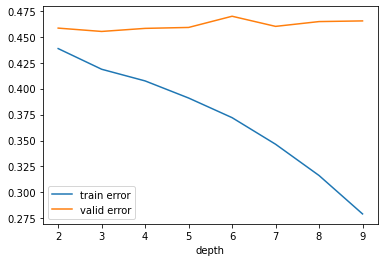

In [10]:
grid = {'max_depth':np.arange(2,10)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True,n_jobs=-1)

treeCV.fit(X,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
print(1-results['train error'])
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)
# feature importance
print()
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)
features_importance = pd.Series(tree.feature_importances_,index=X.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))


Diff_age                          0.617911
DIFF_avg_TD_landed                0.181378
DIFF_avg_opp_SIG_STR_pct          0.103614
DIFF_win_by_Decision_Unanimous    0.052863
DIFF_longest_win_streak           0.044234
dtype: float64


<AxesSubplot:>

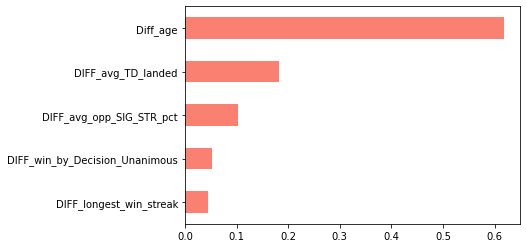

In [12]:
# feature importance
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)
features_importance = pd.Series(tree.feature_importances_,index=X.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))
features_importance.sort_values().plot.barh(color='salmon')

In [13]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)


importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=X.columns)
sorted = tree_importances.sort_values(ascending = True)
importantFeatures = sorted[sorted!=0]
print(importantFeatures.index.values)

['DIFF_longest_win_streak' 'DIFF_win_by_Decision_Unanimous'
 'DIFF_avg_opp_SIG_STR_pct' 'DIFF_avg_TD_landed' 'Diff_age']


### Now decision Tree with only the important features polynomial?

In [14]:


X_important = X[importantFeatures.index.values]
X_important.head()

,DIFF_longest_win_streak,DIFF_win_by_Decision_Unanimous,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_landed,Diff_age
0,0.000000,0.000000,-0.062272,-1.791969e-17,-0.382753
1,0.000000,0.948949,-0.575527,-6.131546e-01,0.191377
2,-0.452283,0.474474,0.194599,-5.605985e-01,0.765506
3,-0.904566,-0.948949,0.212113,-4.379675e-01,-0.765506
4,0.000000,0.474474,0.735828,8.606062e-01,1.148259


             X shape = (7780, 5)
X (engineered) shape = (7780, 20)

best tree depth = {'max_depth': 3}   Best R2 = 0.559

Diff_age                                       0.453772
DIFF_avg_TD_landed                             0.181208
Diff_age^2                                     0.163559
DIFF_avg_opp_SIG_STR_pct                       0.103516
DIFF_avg_opp_SIG_STR_pct DIFF_avg_TD_landed    0.053237
DIFF_longest_win_streak DIFF_avg_TD_landed     0.044708
dtype: float64


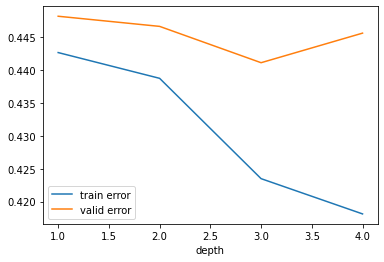

In [15]:
grid = {'max_depth':np.arange(1,5)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True)

poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xe = poly.fit_transform(X_important)
cols = poly.get_feature_names(X_important.columns)
Xe = pd.DataFrame(Xe,columns=cols)
print('             X shape =',X_important.shape)
print('X (engineered) shape =',Xe.shape)



treeCV.fit(Xe,y)


print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)
print()


tree = DecisionTreeClassifier(max_depth = treeCV.best_params_.get('max_depth'))
tree.fit(Xe,y)
features_importance = pd.Series(tree.feature_importances_,index=Xe.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))


<AxesSubplot:>

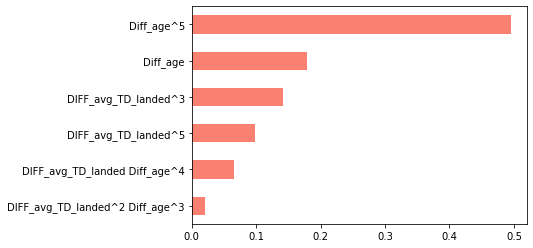

In [84]:
features_importance.sort_values().plot.barh(color='salmon')

## it improved 2%
lets give up on important features for now and check feature engineering on all variables with the important variables

In [85]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xf = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
Xf = pd.DataFrame(Xf,columns=cols)
res = []
for c in Xf.columns:
    for check in X_important.columns:
        if(check in c):
            res.append(c)


            


In [86]:
print(len(res), ' compare to the original number of features after feature engineering', Xf.shape[1])
Xnew = Xf.filter(res,axis=1)



178  compare to the original number of features after feature engineering 4004



best tree depth = {'max_depth': 3}   Best R2 = 0.555


<AxesSubplot:xlabel='depth'>

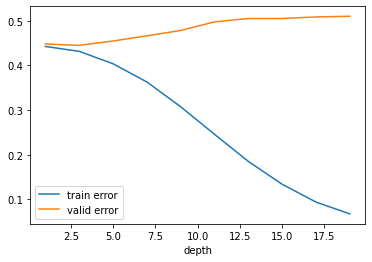

In [87]:
grid = {'max_depth':np.arange(1,20,2)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True, n_jobs = -1)


treeCV.fit(Xnew,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)

Index(['DIFF_avg_TD_landed Fighters_Stance_Orthodox', 'DIFF_wins Diff_age',
       'DIFF_avg_TD_landed DIFF_losses', 'DIFF_avg_TD_landed', 'Diff_age'],
      dtype='object')


<AxesSubplot:>

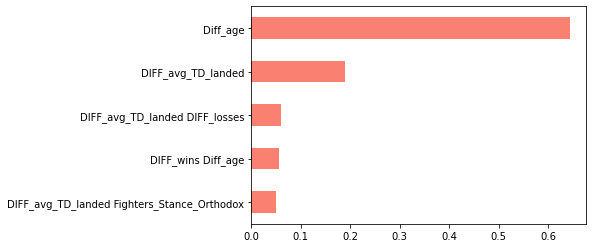

In [88]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(Xnew,y)


importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=Xnew.columns)
sorted = tree_importances.sort_values(ascending = True)
impF = sorted[sorted!=0]

print(impF.index)
impF.sort_values().plot.barh(color='salmon')

In [89]:
# Diff_age^3                         0.494991
# DIFF_avg_TD_landed^5               0.197668
# Diff_age^4                         0.178417
# DIFF_avg_TD_landed Diff_age^4      0.065945
# DIFF_avg_TD_landed^3               0.042489
# DIFF_avg_TD_landed^2 Diff_age^3    0.020490
# Diff_age                                       0.473298
# DIFF_avg_TD_landed                             0.189005
# Diff_age^2                                     0.170597
# DIFF_avg_TD_landed DIFF_losses                 0.060547
# DIFF_wins Diff_age                             0.055826
# DIFF_avg_TD_landed Fighters_Stance_Orthodox    0.050727 

In [90]:
X_collection = Xnew[['DIFF_avg_TD_landed Fighters_Stance_Orthodox', 'DIFF_wins Diff_age',
       'DIFF_avg_TD_landed DIFF_losses', 'DIFF_avg_TD_landed', 'Diff_age']].copy()

X_collection['Diff_age^3'] = X_collection['Diff_age']**3
X_collection['DIFF_avg_TD_landed^5'] = X_collection['DIFF_avg_TD_landed']**5               
X_collection['Diff_age^4'] = X_collection['Diff_age']**4                         
X_collection['DIFF_avg_TD_landed Diff_age^4'] = X_collection['DIFF_avg_TD_landed'] * X_collection['Diff_age^4']
X_collection['DIFF_avg_TD_landed^3'] = X_collection['DIFF_avg_TD_landed']**3               
X_collection['DIFF_avg_TD_landed^2 Diff_age^3'] = X_collection['DIFF_avg_TD_landed']**2 * X_collection['Diff_age^3'] 
X_collection.head(3)

,DIFF_avg_TD_landed Fighters_Stance_Orthodox,DIFF_wins Diff_age,DIFF_avg_TD_landed DIFF_losses,DIFF_avg_TD_landed,Diff_age,Diff_age^3,DIFF_avg_TD_landed^5,Diff_age^4,DIFF_avg_TD_landed Diff_age^4,DIFF_avg_TD_landed^3,DIFF_avg_TD_landed^2 Diff_age^3
0,0.0,-0.0,0.000,0.00000,-2.0,-8.0,0.000000,16.0,0.00000,0.000000,-0.000000
1,-0.0,2.0,-4.375,-1.09375,1.0,1.0,-1.565274,1.0,-1.09375,-1.308441,1.196289
2,-0.0,-4.0,-3.000,-1.00000,4.0,64.0,-1.000000,256.0,-256.00000,-1.000000,64.000000



best tree depth = {'max_depth': 3}   Best R2 = 0.563


<AxesSubplot:xlabel='depth'>

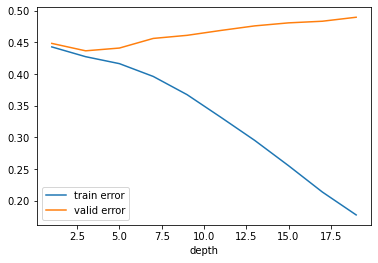

In [91]:
grid = {'max_depth':np.arange(1,20,2)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True, n_jobs = -1)


treeCV.fit(X_collection,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)